# Best DNN on Tag 1 Updated
John Ignacio R.M. 2020-06-11

Model updated with new classes

In [1]:
#ada
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import get_trainvaltest_from_csv, BinaryClassifier

#libs
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import adagrad

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [2]:
data_path = "../processed_data"
signal = "Xtohh2000"
seed = 420
n_features = 14

In [3]:
class BC1(BinaryClassifier):

    def __init__(self, n_input):
        #model
        self.model = Sequential()
        #input
        self.model.add(Dense(32, input_dim = n_input, kernel_initializer='uniform',activation='softplus'))
        #hidden layers
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(64, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(256, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(128, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(64, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(32, kernel_initializer='he_uniform', activation='softplus'))
        self.model.add(Dropout(rate=0.2))
        self.model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))
        #compile
        self.model.compile(optimizer=adagrad(lr=0.05), loss='binary_crossentropy')

        #title
        self.title = 'optimizer: adagrad , lr = 0.05, loss = binary crossentropy'

        #training
        self.history = None

        #name
        self.model_name = "BC1"

In [4]:
sets = get_trainvaltest_from_csv(data_path, signal, .6, .2, .2, seed, region = "SR", tag = 1)
x_train, x_val, x_test = sets["x"].values()
y_train, y_val, y_test = sets["y"].values()
w_train, w_val, w_test = sets["w"].values()
print(x_train.shape, x_val.shape, x_test.shape)

(9097, 14) (3033, 14) (3033, 14)


Train on 9097 samples, validate on 3033 samples
Epoch 1/50
9097/9097 [==============================] - 3s 295us/step - loss: 0.0029 - val_loss: 0.0019
Epoch 2/50
9097/9097 [==============================] - 2s 180us/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/50
9097/9097 [==============================] - 1s 151us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/50
9097/9097 [==============================] - 1s 161us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/50
9097/9097 [==============================] - 1s 136us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/50
9097/9097 [==============================] - 1s 140us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/50
9097/9097 [==============================] - 1s 142us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/50
9097/9097 [==============================] - 1s 146us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/50
9097/9097 [==============================] - 1s 149us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/50
9097

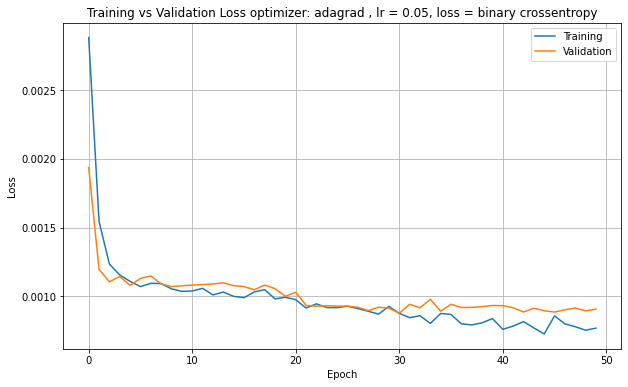

2020-06-11 22:47:12.531090: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-11 22:47:12.542559: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-11 22:47:12.542826: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-06-11 22:47:12.542867: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-06-11 22:47:12.542917: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-06-11 22:47:12.558138: I tensorflow/stream_executor/platform/def

In [5]:
bc1 = BC1(x_train.shape[1])
bc1.fit(x_train, y_train, w_train, x_val, y_val, w_val, 50)
bc1.plot_loss()

In [6]:
bc1.evaluate(x_test, y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       640
           1       0.94      0.90      0.92      2393

    accuracy                           0.87      3033
   macro avg       0.80      0.84      0.82      3033
weighted avg       0.88      0.87      0.88      3033

Confussion Matrix
[[ 500  140]
 [ 245 2148]]


In [7]:
bc1.evaluate_with_weights(x_test, y_test, w_test)

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.71      0.80 4.911409097711487
           1       0.66      0.90      0.76 3.0623852007577277

    accuracy                           0.78 7.9737942984692145
   macro avg       0.79      0.80      0.78 7.9737942984692145
weighted avg       0.82      0.78      0.79 7.9737942984692145

Confussion Matrix
[[3.49358872 1.41782038]
 [0.31326913 2.74911607]]


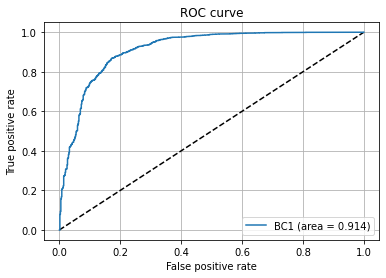

In [8]:
bc1.plot_roc(x_test, y_test)

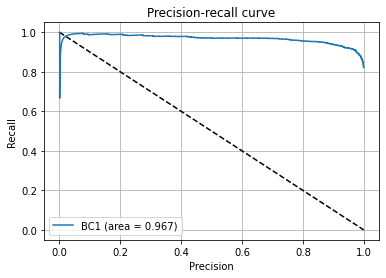

In [9]:
bc1.plot_recall(x_test, y_test)

In [10]:
bc1.save(data_path, "2020-06-11")

modelo
modelo
historia
mas historia
